In [1]:
import os
import torch
import pandas as pd
import numpy as np
import sys
import warnings
from training import train
from params import get_finetune_params
from task_configs.utils import load_task_config
from finetune_utils import seed_torch, get_exp_code, get_splits, get_loader, save_obj
from datasets.slide_datatset import SlideDataset
sys.path.append(os.path.abspath('../dino_stage2'))
from pprint import pprint

from dino_stage2.wsi_dataset import WSIDataset
from dino_stage2.eval_knn import extract_features
warnings.filterwarnings("ignore")

/home/yuhaowang/anaconda3/envs/gigapath/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/home/yuhaowang/anaconda3/envs/gigapath/lib/python3.9/site-packages/torchvision/image.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
/home/yuhaowang/anaconda3/envs/gigapath/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/yuhaowang/anaconda3/envs/gigapath/lib/python3.9/site-packages/timm/models/registry.py:4: FutureWarning: Importing from timm.models.registry is deprecated, please import via 

In [2]:
import pandas as pd
data=pd.read_csv('/home/yuhaowang/project/FMBC/finetune/TCGA-BRCA gene expression/val_0.csv')

In [4]:
data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', '5S_rRNA', '5_8S_rRNA', '7SK', 'A1BG',
       'A1BG-AS1', 'A1CF', 'A2M', 'A2M-AS1',
       ...
       'ZYG11AP1', 'ZYG11B', 'ZYX', 'ZYXP1', 'ZZEF1', 'ZZZ3', 'hsa-mir-1253',
       'hsa-mir-423', 'snoZ196', 'slide_id'],
      dtype='object', length=59430)

In [6]:
labels_keys=['5S_rRNA', '5_8S_rRNA']
labels = data[labels_keys].to_numpy()

In [9]:
import torch
torch.from_numpy(labels[3])

tensor([1.4113, 0.0000], dtype=torch.float64)

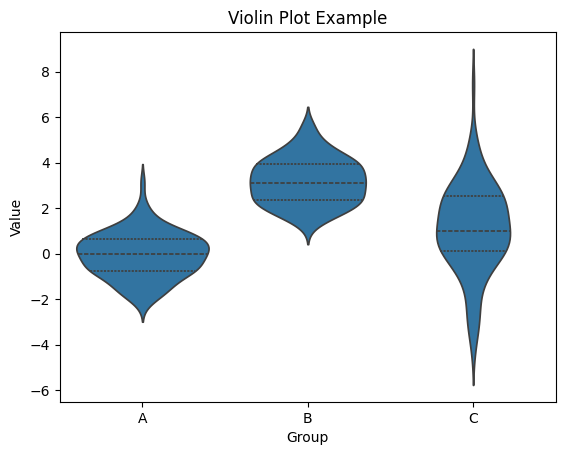

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 示例数据
import pandas as pd
import numpy as np

data = pd.DataFrame({
    "Group": np.repeat(["A", "B", "C"], 100),
    "Value": np.concatenate([
        np.random.normal(0, 1, 100),
        np.random.normal(3, 1, 100),
        np.random.normal(1, 2, 100)
    ])
})

# 绘制小提琴图
sns.violinplot(x="Group", y="Value", data=data, inner="quartile")
plt.title("Violin Plot Example")
plt.show()


In [ ]:
import torch
import numpy as np

# Simulated example: Assume `model` is a pre-trained PyTorch model
# and `dataset` is a PyTorch DataLoader containing the test set.

def evaluate_model(model, dataloader):
    """
    Evaluate the model on the dataloader and return an array of performance metrics for each sample.
    For this example, we will use accuracy as the metric.
    """
    model.eval()
    all_predictions = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in dataloader:
            outputs = model(inputs)
            predictions = torch.argmax(outputs, dim=1)  # Assuming classification task
            all_predictions.extend(predictions.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # Calculate accuracy per sample
    correct = np.array(all_predictions) == np.array(all_labels)
    return correct.astype(int)  # 1 for correct, 0 for incorrect

def bootstrap_confidence_interval(data, num_bootstrap=1000, ci=95):
    """
    Perform non-parametric bootstrapping to calculate confidence intervals.
    """
    n = len(data)
    bootstrap_means = []

    for _ in range(num_bootstrap):
        # Sample with replacement
        sample = np.random.choice(data, size=n, replace=True)
        bootstrap_means.append(np.mean(sample))

    # Calculate the confidence interval
    lower_percentile = (100 - ci) / 2
    upper_percentile = 100 - lower_percentile
    return np.percentile(bootstrap_means, [lower_percentile, upper_percentile])

# Example usage:
# Assuming `test_loader` is the dataloader for your test dataset
performance_data = evaluate_model(model, test_loader)

# Perform bootstrapping to calculate the 95% confidence interval
ci_95 = bootstrap_confidence_interval(performance_data, num_bootstrap=1000, ci=95)

print(f"95% Confidence Interval for Accuracy: {ci_95}")

# Highlighting the best and second-best models (example workflow)
metrics = {
    "Model A": np.random.uniform(0.7, 0.9, 1000),  # Simulated bootstrap replicates
    "Model B": np.random.uniform(0.6, 0.85, 1000),
    "Model C": np.random.uniform(0.8, 0.95, 1000),
}

# Calculate mean and CI for each model
results = {}
for model_name, data in metrics.items():
    mean = np.mean(data)
    ci = bootstrap_confidence_interval(data, num_bootstrap=1000, ci=95)
    results[model_name] = (mean, ci)

# Identify the best and second-best models
sorted_results = sorted(results.items(), key=lambda x: x[1][0], reverse=True)
best_model = sorted_results[0][0]
second_best_model = sorted_results[1][0]

print("\nModel Performance:")
for model_name, (mean, ci) in results.items():
    display = f"{model_name}: Mean={mean:.3f}, 95% CI={ci}"
    if model_name == best_model:
        display = f"**{display}** (Best)"
    elif model_name == second_best_model:
        display = f"_{display}_ (Second Best)"
    print(display)


In [ ]:
import pandas as pd
data=pd.read_csv("/ruiyan/yuhao/project/FMBC/finetune/outputs/BRACS_Coarse/BRACS_COARSE/eval_pretrained_BRACS_COARSE/summary.csv")
show_data = data.transpose()
print(show_data)

                         0
val_loss          1.582147
val_bacc          0.548413
val_acc           0.666667
val_macro_auroc   0.795452
val_macro_auprc   0.650624
val_qwk           0.641737
val_0_auroc       0.869505
val_1_auroc       0.619792
val_2_auroc       0.897059
val_0_auprc       0.893641
val_1_auprc       0.218046
val_2_auprc       0.840184
test_loss         1.358094
test_bacc         0.591485
test_acc          0.699029
test_macro_auroc  0.799331
test_macro_auprc  0.637563
test_qwk          0.635058
test_0_auroc      0.824752
test_1_auroc      0.677155
test_2_auroc      0.896086
test_0_auprc      0.820505
test_1_auprc      0.265857
test_2_auprc      0.826328


: 

In [12]:
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-3C-AALI-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-3C-AALI.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-3C-AALI-01Z-00-DX2.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-3C-AALI.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-3C-AALJ-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-3C-AALJ.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-3C-AALJ-01Z-00-DX2.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-3C-AALJ.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-3C-AALK-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-3C-AALK.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-4H-AAAK-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-4H-AAAK.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-5L-AAT0-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-5L-AAT0.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-5L-AAT1-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-5L-AAT1.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-5T-A9QA-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-5T-A9QA.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A1-A0SB-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A1-A0SB.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A1-A0SD-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A1-A0SD.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A1-A0SE-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A1-A0SE.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A1-A0SF-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A1-A0SF.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A1-A0SH-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A1-A0SH.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A1-A0SI-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A1-A0SI.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A1-A0SJ-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A1-A0SJ.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A1-A0SK-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A1-A0SK.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A1-A0SM-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A1-A0SM.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A1-A0SN-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A1-A0SN.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A1-A0SP-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A1-A0SP.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A1-A0SQ-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A1-A0SQ.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A04N-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A04N.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A04P-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A04P.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A04Q-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A04Q.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A04R-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A04R.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A04T-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A04T.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A04U-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A04U.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A04V-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A04V.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A04W-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A04W.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A04X-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A04X.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A04Y-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A04Y.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A0CK-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A0CK.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A0CM-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A0CM.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A0CO-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A0CO.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A0CP-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A0CP.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A0CQ-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A0CQ.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A0CR-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A0CR.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A0CS-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A0CS.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A0CT-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A0CT.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A0CU-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A0CU.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A0CV-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A0CV.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A0CW-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A0CW.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A0CX-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A0CX.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A0CY-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A0CY.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A0CZ-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A0CZ.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A0D0-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A0D0.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A0D3-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A0D3.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A0D4-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A0D4.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A0EM-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A0EM.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A0EN-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A0EN.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A0EO-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A0EO.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A0EP-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A0EP.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A0EQ-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A0EQ.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A0ER-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A0ER.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A0ES-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A0ES.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A0ET-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A0ET.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A0EU-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A0EU.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A0EV-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A0EV.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A0EW-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A0EW.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A0EX-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A0EX.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A0EY-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A0EY.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A0ST-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A0ST.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A0SU-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A0SU.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A0SV-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A0SV.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A0SW-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A0SW.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A0SX-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A0SX.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A0SY-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A0SY.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A0T0-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A0T0.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A0T1-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A0T1.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A0T2-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A0T2.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A0T3-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A0T3.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A0T4-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A0T4.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A0T5-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A0T5.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A0T6-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A0T6.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A0T7-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A0T7.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A0YC-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A0YC.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A0YD-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A0YD.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A0YE-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A0YE.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A0YF-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A0YF.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A0YG-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A0YG.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A0YH-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A0YH.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A0YI-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A0YI.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A0YJ-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A0YJ.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A0YK-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A0YK.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A0YL-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A0YL.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A0YM-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A0YM.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A0YT-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A0YT.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A1FV-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A1FV.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A1FW-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A1FW.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A1FX-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A1FX.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A1FZ-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A1FZ.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A1G0-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A1G0.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A1G1-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A1G1.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A1G4-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A1G4.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A1G6-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A1G6.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A259-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A259.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A25A-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A25A.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A25B-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A25B.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A25C-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A25C.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A25D-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A25D.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A25E-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A25E.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A25F-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A25F.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A3KC-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A3KC.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A3KD-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A3KD.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A3XS-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A3XS.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A3XT-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A3XT.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A3XU-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A3XU.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A3XV-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A3XV.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A3XW-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A3XW.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A3XX-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A3XX.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A3XY-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A3XY.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A3XZ-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A3XZ.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A3Y0-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A3Y0.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A4RW-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A4RW.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A4RX-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A4RX.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A4RY-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A4RY.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A4S0-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A4S0.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A4S1-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A4S1.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A4S2-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A4S2.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A4S3-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A2-A4S3.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A7-A0CD-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A7-A0CD.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A7-A0CD-01Z-00-DX2.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A7-A0CD.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A7-A0CE-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A7-A0CE.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A7-A0CE-01Z-00-DX2.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A7-A0CE.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A7-A0CG-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A7-A0CG.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A7-A0CG-01Z-00-DX2.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A7-A0CG.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A7-A0CH-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A7-A0CH.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A7-A0CH-01Z-00-DX2.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A7-A0CH.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A7-A0CJ-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A7-A0CJ.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A7-A0CJ-01Z-00-DX2.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A7-A0CJ.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A7-A0D9-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A7-A0D9.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A7-A0D9-01Z-00-DX2.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A7-A0D9.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A7-A0DA-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A7-A0DA.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A7-A0DA-01Z-00-DX2.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A7-A0DA.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A7-A0DB-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A7-A0DB.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A7-A0DB-01Z-00-DX2.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A7-A0DB.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A7-A0DC-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A7-A0DC.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A7-A0DC-01Z-00-DX2.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A7-A0DC.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A7-A13D-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A7-A13D.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A7-A13D-01Z-00-DX2.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A7-A13D.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A7-A13E-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A7-A13E.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A7-A13E-01Z-00-DX2.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A7-A13E.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A7-A13F-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A7-A13F.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A7-A13F-01Z-00-DX2.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A7-A13F.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A7-A13G-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A7-A13G.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A7-A13G-01Z-00-DX2.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A7-A13G.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A7-A13H-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A7-A13H.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A7-A13H-01Z-00-DX2.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A7-A13H.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A7-A26E-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A7-A26E.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A7-A26G-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A7-A26G.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A7-A26H-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A7-A26H.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A7-A26I-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A7-A26I.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A7-A26J-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A7-A26J.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A7-A2KD-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A7-A2KD.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A7-A3IY-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A7-A3IY.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A7-A3IZ-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A7-A3IZ.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A7-A3J0-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A7-A3J0.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A7-A3J1-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A7-A3J1.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A7-A3RF-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A7-A3RF.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A7-A425-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A7-A425.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A7-A426-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A7-A426.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A7-A4SA-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A7-A4SA.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A7-A4SB-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A7-A4SB.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A7-A4SC-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A7-A4SC.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A7-A4SD-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A7-A4SD.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A7-A4SE-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A7-A4SE.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A7-A4SF-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A7-A4SF.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A7-A56D-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A7-A56D.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A7-A5ZV-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A7-A5ZV.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A7-A5ZW-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A7-A5ZW.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A7-A5ZX-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A7-A5ZX.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A7-A5ZX-01Z-00-DX2.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A7-A5ZX.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A7-A6VV-01Z-00-DX2.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A7-A6VV.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A7-A6VW-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A7-A6VW.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A7-A6VX-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A7-A6VX.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A7-A6VX-01Z-00-DX2.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A7-A6VX.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A7-A6VY-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A7-A6VY.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A06N-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A06N.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A06O-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A06O.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A06P-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A06P.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A06Q-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A06Q.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A06R-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A06R.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A06T-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A06T.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A06U-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A06U.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A06X-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A06X.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A06Y-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A06Y.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A06Z-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A06Z.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A075-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A075.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A076-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A076.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A079-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A079.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A07B-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A07B.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A07C-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A07C.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A07E-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A07E.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A07F-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A07F.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A07G-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A07G.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A07I-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A07I.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A07J-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A07J.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A07L-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A07L.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A07O-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A07O.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A07P-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A07P.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A07R-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A07R.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A07S-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A07S.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A07U-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A07U.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A07W-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A07W.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A07Z-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A07Z.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A081-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A081.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A082-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A082.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A083-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A083.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A084-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A084.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A085-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A085.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A086-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A086.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A08A-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A08A.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A08B-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A08B.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A08C-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A08C.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A08F-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A08F.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A08G-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A08G.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A08H-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A08H.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A08I-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A08I.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A08J-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A08J.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A08L-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A08L.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A08O-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A08O.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A08P-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A08P.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A08R-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A08R.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A08S-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A08S.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A08X-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A08X.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A08Z-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A08Z.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A090-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A090.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A091-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A091.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A092-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A092.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A093-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A093.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A094-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A094.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A095-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A095.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A096-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A096.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A097-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A097.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A099-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A099.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A09A-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A09A.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A09B-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A09B.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A09C-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A09C.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A09D-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A09D.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A09E-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A09E.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A09G-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A09G.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A09I-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A09I.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A09K-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A09K.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A09M-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A09M.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A09N-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A09N.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A09Q-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A09Q.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A09R-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A09R.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A09T-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A09T.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A09V-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A09V.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A09W-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A09W.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A09X-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A09X.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A09Z-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A09Z.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A0A1-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A0A1.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A0A2-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A0A2.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A0A4-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A0A4.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A0A7-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A0A7.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A0A9-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A0A9.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A0AB-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A0AB.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A0AD-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-A8-A0AD.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AC-A23C-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AC-A23C.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AC-A23E-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AC-A23E.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AC-A23G-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AC-A23G.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AC-A23H-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AC-A23H.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AC-A2B8-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AC-A2B8.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AC-A2BK-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AC-A2BK.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AC-A2BM-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AC-A2BM.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AC-A2FB-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AC-A2FB.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AC-A2FE-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AC-A2FE.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AC-A2FF-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AC-A2FF.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AC-A2FG-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AC-A2FG.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AC-A2FK-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AC-A2FK.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AC-A2FM-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AC-A2FM.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AC-A2FO-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AC-A2FO.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AC-A2QH-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AC-A2QH.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AC-A2QI-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AC-A2QI.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AC-A2QJ-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AC-A2QJ.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AC-A3BB-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AC-A3BB.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AC-A3EH-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AC-A3EH.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AC-A3HN-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AC-A3HN.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AC-A3OD-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AC-A3OD.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AC-A3QP-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AC-A3QP.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AC-A3QQ-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AC-A3QQ.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AC-A3TM-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AC-A3TM.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AC-A3TN-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AC-A3TN.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AC-A3W5-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AC-A3W5.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AC-A3W6-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AC-A3W6.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AC-A3W7-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AC-A3W7.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AC-A3YI-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AC-A3YI.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AC-A3YJ-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AC-A3YJ.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AC-A4ZE-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AC-A4ZE.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AC-A5EH-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AC-A5EH.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AC-A5EI-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AC-A5EI.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AC-A5XU-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AC-A5XU.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AC-A62V-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AC-A62V.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AC-A62X-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AC-A62X.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AC-A62Y-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AC-A62Y.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AC-A6IV-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AC-A6IV.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AC-A6IW-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AC-A6IW.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AC-A6IX-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AC-A6IX.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AC-A6NO-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AC-A6NO.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AC-A7VB-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AC-A7VB.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AC-A7VC-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AC-A7VC.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AC-A8OP-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AC-A8OP.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AC-A8OQ-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AC-A8OQ.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AC-A8OR-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AC-A8OR.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AC-A8OS-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AC-A8OS.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AN-A03Y-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AN-A03Y.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AN-A041-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AN-A041.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AN-A0AJ-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AN-A0AJ.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AN-A0AK-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AN-A0AK.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AN-A0AL-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AN-A0AL.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AN-A0AM-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AN-A0AM.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AN-A0AR-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AN-A0AR.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AN-A0AS-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AN-A0AS.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AN-A0AT-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AN-A0AT.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AN-A0FD-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AN-A0FD.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AN-A0FF-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AN-A0FF.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AN-A0FJ-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AN-A0FJ.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AN-A0FK-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AN-A0FK.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AN-A0FL-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AN-A0FL.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AN-A0FN-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AN-A0FN.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AN-A0FS-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AN-A0FS.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AN-A0FT-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AN-A0FT.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AN-A0FV-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AN-A0FV.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AN-A0FW-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AN-A0FW.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AN-A0FX-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AN-A0FX.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AN-A0FY-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AN-A0FY.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AN-A0FZ-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AN-A0FZ.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AN-A0G0-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AN-A0G0.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AN-A0XL-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AN-A0XL.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AN-A0XN-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AN-A0XN.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AN-A0XO-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AN-A0XO.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AN-A0XP-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AN-A0XP.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AN-A0XS-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AN-A0XS.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AN-A0XT-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AN-A0XT.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AN-A0XU-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AN-A0XU.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AN-A0XW-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AN-A0XW.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AO-A03L-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AO-A03L.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AO-A03M-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AO-A03M.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AO-A03N-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AO-A03N.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AO-A03O-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AO-A03O.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AO-A03P-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AO-A03P.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AO-A03R-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AO-A03R.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AO-A03T-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AO-A03T.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AO-A03U-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AO-A03U.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AO-A03V-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AO-A03V.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AO-A0J2-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AO-A0J2.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AO-A0J3-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AO-A0J3.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AO-A0J4-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AO-A0J4.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AO-A0J5-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AO-A0J5.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AO-A0J6-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AO-A0J6.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AO-A0J7-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AO-A0J7.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AO-A0J8-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AO-A0J8.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AO-A0J9-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AO-A0J9.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AO-A0JA-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AO-A0JA.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AO-A0JB-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AO-A0JB.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AO-A0JC-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AO-A0JC.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AO-A0JD-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AO-A0JD.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AO-A0JE-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AO-A0JE.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AO-A0JF-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AO-A0JF.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AO-A0JG-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AO-A0JG.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AO-A0JI-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AO-A0JI.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AO-A0JJ-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AO-A0JJ.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AO-A0JL-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AO-A0JL.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AO-A0JM-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AO-A0JM.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AO-A124-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AO-A124.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AO-A125-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AO-A125.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AO-A126-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AO-A126.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AO-A128-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AO-A128.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AO-A129-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AO-A129.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AO-A12A-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AO-A12A.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AO-A12B-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AO-A12B.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AO-A12C-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AO-A12C.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AO-A12D-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AO-A12D.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AO-A12E-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AO-A12E.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AO-A12F-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AO-A12F.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AO-A12G-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AO-A12G.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AO-A12H-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AO-A12H.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AO-A1KO-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AO-A1KO.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AO-A1KP-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AO-A1KP.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AO-A1KQ-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AO-A1KQ.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AO-A1KR-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AO-A1KR.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AO-A1KS-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AO-A1KS.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AO-A1KT-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AO-A1KT.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AQ-A04H-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AQ-A04H.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AQ-A04J-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AQ-A04J.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AQ-A04L-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AQ-A04L.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AQ-A0Y5-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AQ-A0Y5.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AQ-A54N-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AQ-A54N.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AQ-A54O-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AQ-A54O.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AQ-A7U7-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AQ-A7U7.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AR-A0TP-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AR-A0TP.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AR-A0TQ-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AR-A0TQ.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AR-A0TR-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AR-A0TR.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AR-A0TS-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AR-A0TS.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AR-A0TT-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AR-A0TT.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AR-A0TU-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AR-A0TU.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AR-A0TV-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AR-A0TV.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AR-A0TW-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AR-A0TW.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AR-A0TX-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AR-A0TX.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AR-A0TY-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AR-A0TY.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AR-A0TZ-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AR-A0TZ.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AR-A0U0-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AR-A0U0.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AR-A0U1-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AR-A0U1.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AR-A0U2-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AR-A0U2.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AR-A0U3-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AR-A0U3.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AR-A0U4-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AR-A0U4.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AR-A1AH-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AR-A1AH.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AR-A1AI-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AR-A1AI.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AR-A1AJ-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AR-A1AJ.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AR-A1AK-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AR-A1AK.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AR-A1AL-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AR-A1AL.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AR-A1AM-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AR-A1AM.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AR-A1AN-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AR-A1AN.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AR-A1AO-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AR-A1AO.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AR-A1AP-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AR-A1AP.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AR-A1AQ-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AR-A1AQ.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AR-A1AS-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AR-A1AS.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AR-A1AT-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AR-A1AT.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AR-A1AU-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AR-A1AU.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AR-A1AV-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AR-A1AV.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AR-A1AW-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AR-A1AW.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AR-A1AX-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AR-A1AX.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AR-A1AY-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AR-A1AY.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AR-A24H-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AR-A24H.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AR-A24K-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AR-A24K.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AR-A24L-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AR-A24L.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AR-A24M-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AR-A24M.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AR-A24N-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AR-A24N.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AR-A24O-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AR-A24O.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AR-A24P-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AR-A24P.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AR-A24Q-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AR-A24Q.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AR-A24R-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AR-A24R.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AR-A24S-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AR-A24S.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AR-A24T-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AR-A24T.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AR-A24U-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AR-A24U.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AR-A24V-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AR-A24V.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AR-A24W-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AR-A24W.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AR-A24X-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AR-A24X.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AR-A24Z-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AR-A24Z.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AR-A250-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AR-A250.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AR-A251-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AR-A251.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AR-A252-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AR-A252.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AR-A254-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AR-A254.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AR-A255-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AR-A255.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AR-A256-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AR-A256.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AR-A2LE-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AR-A2LE.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AR-A2LH-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AR-A2LH.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AR-A2LJ-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AR-A2LJ.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AR-A2LK-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AR-A2LK.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AR-A2LL-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AR-A2LL.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AR-A2LM-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AR-A2LM.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AR-A2LN-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AR-A2LN.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AR-A2LO-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AR-A2LO.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AR-A2LQ-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AR-A2LQ.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AR-A2LR-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AR-A2LR.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AR-A5QM-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AR-A5QM.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AR-A5QN-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AR-A5QN.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AR-A5QP-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AR-A5QP.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AR-A5QQ-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-AR-A5QQ.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-B6-A0I1-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-B6-A0I1.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-B6-A0I2-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-B6-A0I2.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-B6-A0I5-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-B6-A0I5.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-B6-A0I6-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-B6-A0I6.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-B6-A0I8-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-B6-A0I8.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-B6-A0I9-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-B6-A0I9.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-B6-A0IA-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-B6-A0IA.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-B6-A0IB-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-B6-A0IB.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-B6-A0IC-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-B6-A0IC.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-B6-A0IE-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-B6-A0IE.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-B6-A0IG-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-B6-A0IG.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-B6-A0IH-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-B6-A0IH.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-B6-A0IJ-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-B6-A0IJ.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-B6-A0IK-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-B6-A0IK.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-B6-A0IM-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-B6-A0IM.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-B6-A0IN-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-B6-A0IN.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-B6-A0IO-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-B6-A0IO.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-B6-A0IP-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-B6-A0IP.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-B6-A0IQ-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-B6-A0IQ.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-B6-A0RE-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-B6-A0RE.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-B6-A0RG-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-B6-A0RG.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-B6-A0RH-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-B6-A0RH.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-B6-A0RI-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-B6-A0RI.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-B6-A0RL-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-B6-A0RL.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-B6-A0RM-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-B6-A0RM.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-B6-A0RN-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-B6-A0RN.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-B6-A0RO-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-B6-A0RO.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-B6-A0RP-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-B6-A0RP.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-B6-A0RQ-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-B6-A0RQ.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-B6-A0RS-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-B6-A0RS.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-B6-A0RT-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-B6-A0RT.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-B6-A0RU-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-B6-A0RU.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-B6-A0RV-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-B6-A0RV.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-B6-A0WS-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-B6-A0WS.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-B6-A0WT-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-B6-A0WT.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-B6-A0WV-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-B6-A0WV.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-B6-A0WW-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-B6-A0WW.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-B6-A0WX-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-B6-A0WX.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-B6-A0WY-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-B6-A0WY.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-B6-A0WZ-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-B6-A0WZ.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-B6-A0X0-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-B6-A0X0.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-B6-A0X1-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-B6-A0X1.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-B6-A0X4-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-B6-A0X4.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-B6-A0X5-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-B6-A0X5.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-B6-A0X7-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-B6-A0X7.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-B6-A1KC-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-B6-A1KC.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-B6-A1KF-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-B6-A1KF.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-B6-A1KI-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-B6-A1KI.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-B6-A1KN-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-B6-A1KN.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-B6-A2IU-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-B6-A2IU.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0AU-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0AU.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0AV-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0AV.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0AW-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0AW.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0AY-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0AY.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0AZ-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0AZ.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0B0-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0B0.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0B1-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0B1.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0B3-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0B3.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0B4-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0B4.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0B5-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0B5.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0B6-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0B6.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0B7-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0B7.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0B8-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0B8.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0B9-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0B9.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0BA-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0BA.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0BC-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0BC.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0BD-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0BD.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0BF-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0BF.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0BG-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0BG.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0BJ-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0BJ.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0BL-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0BL.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0BM-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0BM.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0BO-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0BO.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0BP-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0BP.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0BQ-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0BQ.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0BR-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0BR.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0BS-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0BS.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0BT-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0BT.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0BV-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0BV.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0BW-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0BW.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0BZ-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0BZ.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0C0-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0C0.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0C1-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0C1.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0C3-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0C3.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0C7-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0C7.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0DD-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0DD.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0DE-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0DE.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0DG-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0DG.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0DH-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0DH.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0DI-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0DI.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0DK-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0DK.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0DL-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0DL.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0DO-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0DO.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0DP-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0DP.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0DQ-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0DQ.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0DS-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0DS.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0DT-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0DT.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0DV-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0DV.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0DX-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0DX.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0DZ-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0DZ.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0E0-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0E0.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0E1-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0E1.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0E2-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0E2.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0E6-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0E6.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0E7-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0E7.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0E9-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0E9.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0EA-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0EA.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0EB-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0EB.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0EE-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0EE.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0EI-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0EI.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0GY-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0GY.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0GZ-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0GZ.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0H0-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0H0.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0H3-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0H3.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0H5-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0H5.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0H6-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0H6.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0H7-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0H7.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0H9-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0H9.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0HA-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0HA.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0HB-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0HB.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0HF-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0HF.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0HI-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0HI.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0HK-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0HK.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0HL-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0HL.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0HN-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0HN.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0HO-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0HO.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0HP-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0HP.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0HQ-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0HQ.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0HU-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0HU.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0HW-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0HW.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0HX-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0HX.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0HY-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0HY.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0RX-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0RX.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0W3-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0W3.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0W4-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0W4.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0W5-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0W5.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0W7-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0W7.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0WA-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A0WA.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A18F-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A18F.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A18G-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A18G.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A18H-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A18H.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A18I-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A18I.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A18J-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A18J.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A18L-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A18L.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A18M-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A18M.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A18N-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A18N.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A18Q-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A18Q.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A18R-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A18R.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A18S-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A18S.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A18T-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A18T.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A18U-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A18U.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A18V-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A18V.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A1EN-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A1EN.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A1EO-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A1EO.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A1ES-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A1ES.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A1ET-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A1ET.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A1EU-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A1EU.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A1EV-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A1EV.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A1EW-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A1EW.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A1EX-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A1EX.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A1EY-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A1EY.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A1F0-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A1F0.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A1F2-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A1F2.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A1F5-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A1F5.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A1F6-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A1F6.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A1F8-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A1F8.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A1FC-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A1FC.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A1FE-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A1FE.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A1FG-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A1FG.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A1FH-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A1FH.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A1FJ-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A1FJ.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A1FL-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A1FL.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A1FM-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A1FM.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A1FN-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A1FN.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A1FR-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A1FR.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A1FU-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A1FU.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A201-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A201.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A202-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A202.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A203-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A203.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A204-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A204.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A208-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A208.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A209-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A209.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A28O-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A28O.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A28Q-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A28Q.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A2L8-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A2L8.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A42T-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A42T.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A42U-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A42U.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A42V-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A42V.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A5IZ-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A5IZ.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A5J0-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-BH-A5J0.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-C8-A12K-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-C8-A12K.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-C8-A12L-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-C8-A12L.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-C8-A12M-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-C8-A12M.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-C8-A12N-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-C8-A12N.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-C8-A12O-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-C8-A12O.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-C8-A12P-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-C8-A12P.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-C8-A12Q-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-C8-A12Q.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-C8-A12T-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-C8-A12T.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-C8-A12U-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-C8-A12U.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-C8-A12V-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-C8-A12V.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-C8-A12W-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-C8-A12W.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-C8-A12X-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-C8-A12X.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-C8-A12Y-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-C8-A12Y.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-C8-A12Z-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-C8-A12Z.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-C8-A130-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-C8-A130.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-C8-A131-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-C8-A131.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-C8-A132-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-C8-A132.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-C8-A133-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-C8-A133.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-C8-A134-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-C8-A134.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-C8-A135-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-C8-A135.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-C8-A137-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-C8-A137.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-C8-A1HE-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-C8-A1HE.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-C8-A1HF-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-C8-A1HF.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-C8-A1HG-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-C8-A1HG.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-C8-A1HI-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-C8-A1HI.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-C8-A1HJ-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-C8-A1HJ.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-C8-A1HK-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-C8-A1HK.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-C8-A1HL-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-C8-A1HL.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-C8-A1HM-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-C8-A1HM.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-C8-A1HN-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-C8-A1HN.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-C8-A1HO-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-C8-A1HO.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-C8-A26V-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-C8-A26V.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-C8-A26W-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-C8-A26W.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-C8-A26X-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-C8-A26X.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-C8-A26Y-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-C8-A26Y.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-C8-A26Z-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-C8-A26Z.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-C8-A273-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-C8-A273.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-C8-A274-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-C8-A274.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-C8-A275-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-C8-A275.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-C8-A278-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-C8-A278.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-C8-A27A-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-C8-A27A.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-C8-A27B-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-C8-A27B.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-C8-A3M7-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-C8-A3M7.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-C8-A3M8-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-C8-A3M8.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-C8-A8HP-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-C8-A8HP.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-C8-A8HQ-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-C8-A8HQ.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-C8-A8HR-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-C8-A8HR.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-C8-A9FZ-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-C8-A9FZ.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A13Y-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A13Y.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A13Y-01Z-00-DX2.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A13Y.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A13Z-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A13Z.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A140-01Z-00-DX2.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A140.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A141-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A141.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A141-01Z-00-DX2.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A141.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A142-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A142.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A143-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A143.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A145-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A145.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A145-01Z-00-DX2.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A145.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A146-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A146.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A147-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A147.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1J8-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1J8.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1J8-01Z-00-DX2.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1J8.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1J9-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1J9.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1J9-01Z-00-DX2.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1J9.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1JA-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1JA.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1JB-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1JB.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1JC-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1JC.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1JC-01Z-00-DX2.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1JC.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1JD-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1JD.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1JD-01Z-00-DX2.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1JD.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1JE-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1JE.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1JE-01Z-00-DX2.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1JE.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1JF-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1JF.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1JG-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1JG.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1JH-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1JH.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1JI-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1JI.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1JI-01Z-00-DX2.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1JI.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1JJ-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1JJ.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1JJ-01Z-00-DX2.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1JJ.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1JK-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1JK.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1JL-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1JL.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1JM-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1JM.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1JN-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1JN.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1JP-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1JP.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1JS-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1JS.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1JT-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1JT.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1JT-01Z-00-DX2.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1JT.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1JU-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1JU.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1X5-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1X5.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1X5-01Z-00-DX2.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1X5.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1X6-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1X6.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1X6-01Z-00-DX2.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1X6.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1X7-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1X7.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1X7-01Z-00-DX2.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1X7.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1X8-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1X8.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1X9-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1X9.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1XA-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1XA.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1XB-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1XB.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1XB-01Z-00-DX2.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1XB.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1XC-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1XC.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1XC-01Z-00-DX2.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1XC.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1XD-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1XD.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1XF-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1XF.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1XF-01Z-00-DX2.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1XF.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1XG-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1XG.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1XJ-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1XJ.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1XK-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1XK.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1XL-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1XL.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1XL-01Z-00-DX2.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1XL.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1XM-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1XM.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1XO-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1XO.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1XQ-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1XQ.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1XR-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1XR.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1XR-01Z-00-DX2.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1XR.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1XS-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1XS.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1XS-01Z-00-DX2.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1XS.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1XT-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1XT.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1XU-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1XU.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1XV-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1XV.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1XV-01Z-00-DX2.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1XV.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1XW-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1XW.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1XW-01Z-00-DX2.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1XW.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1XY-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1XY.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1XY-01Z-00-DX2.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1XY.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1XZ-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1XZ.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1XZ-01Z-00-DX2.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1XZ.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1Y0-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1Y0.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1Y0-01Z-00-DX2.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1Y0.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1Y1-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1Y1.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1Y1-01Z-00-DX2.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1Y1.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1Y2-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1Y2.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1Y3-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1Y3.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1Y3-01Z-00-DX2.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A1Y3.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A27E-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A27E.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A27F-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A27F.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A27G-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A27G.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A27H-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A27H.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A27I-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A27I.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A27K-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A27K.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A27L-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A27L.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A27M-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A27M.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A27N-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A27N.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A27N-01Z-00-DX2.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A27N.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A27P-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A27P.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A27R-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A27R.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A27R-01Z-00-DX2.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A27R.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A27T-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A27T.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A27T-01Z-00-DX2.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A27T.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A27V-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A27V.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A27V-01Z-00-DX2.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A27V.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A27W-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A27W.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A27W-01Z-00-DX2.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A27W.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A3Z5-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A3Z5.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A3Z5-01Z-00-DX2.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A3Z5.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A3Z5-01Z-00-DX3.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A3Z5.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A3Z6-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A3Z6.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A3Z6-01Z-00-DX2.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A3Z6.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A3Z6-01Z-00-DX3.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A3Z6.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A4Z1-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A4Z1.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A73U-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A73U.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A73U-01Z-00-DX2.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A73U.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A73W-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A73W.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A73W-01Z-00-DX2.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A73W.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A73X-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A73X.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A73X-01Z-00-DX2.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-D8-A73X.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A105-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A105.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A106-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A106.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A107-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A107.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A108-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A108.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A109-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A109.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A10A-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A10A.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A10B-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A10B.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A10C-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A10C.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A10E-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A10E.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A10F-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A10F.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A14N-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A14N.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A14O-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A14O.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A14P-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A14P.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A14Q-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A14Q.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A14R-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A14R.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A14S-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A14S.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A14T-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A14T.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A14U-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A14U.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A14V-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A14V.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A14W-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A14W.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A14X-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A14X.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A14Y-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A14Y.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A14Z-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A14Z.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A150-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A150.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A152-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A152.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A153-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A153.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A154-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A154.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A155-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A155.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A156-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A156.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A158-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A158.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A159-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A159.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A15A-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A15A.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A15D-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A15D.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A15E-06Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A15E.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A15F-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A15F.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A15G-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A15G.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A15H-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A15H.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A15I-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A15I.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A15J-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A15J.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A15K-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A15K.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A15L-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A15L.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A15M-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A15M.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A15O-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A15O.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A15P-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A15P.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A15R-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A15R.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A15S-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A15S.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A15T-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A15T.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A1AZ-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A1AZ.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A1B0-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A1B0.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A1B1-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A1B1.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A1B4-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A1B4.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A1B5-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A1B5.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A1B6-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A1B6.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A1BC-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A1BC.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A1BD-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A1BD.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A1IE-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A1IE.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A1IF-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A1IF.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A1IG-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A1IG.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A1IH-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A1IH.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A1IJ-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A1IJ.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A1IK-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A1IK.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A1IL-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A1IL.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A1IN-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A1IN.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A1IO-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A1IO.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A1IU-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A1IU.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A1L6-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A1L6.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A1L7-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A1L7.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A1L8-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A1L8.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A1L9-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A1L9.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A1LA-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A1LA.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A1LB-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A1LB.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A1LE-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A1LE.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A1LG-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A1LG.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A1LH-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A1LH.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A1LI-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A1LI.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A1LK-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A1LK.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A1LL-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A1LL.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A1LS-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A1LS.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A2P5-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A2P5.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A2P6-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A2P6.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A3DX-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A3DX.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A56Z-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A56Z.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A570-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A570.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A572-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A572.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A573-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A573.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A574-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A574.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A576-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A576.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A9RU-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E2-A9RU.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E9-A1N3-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E9-A1N3.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E9-A1N4-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E9-A1N4.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E9-A1N5-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E9-A1N5.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E9-A1N6-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E9-A1N6.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E9-A1N8-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E9-A1N8.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E9-A1N9-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E9-A1N9.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E9-A1NA-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E9-A1NA.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E9-A1NC-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E9-A1NC.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E9-A1ND-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E9-A1ND.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E9-A1NE-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E9-A1NE.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E9-A1NF-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E9-A1NF.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E9-A1NG-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E9-A1NG.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E9-A1NH-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E9-A1NH.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E9-A1NI-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E9-A1NI.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E9-A1QZ-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E9-A1QZ.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E9-A1R0-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E9-A1R0.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E9-A1R2-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E9-A1R2.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E9-A1R3-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E9-A1R3.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E9-A1R4-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E9-A1R4.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E9-A1R5-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E9-A1R5.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E9-A1R6-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E9-A1R6.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E9-A1R7-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E9-A1R7.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E9-A1RA-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E9-A1RA.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E9-A1RB-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E9-A1RB.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E9-A1RC-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E9-A1RC.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E9-A1RD-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E9-A1RD.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E9-A1RE-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E9-A1RE.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E9-A1RF-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E9-A1RF.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E9-A1RG-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E9-A1RG.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E9-A1RH-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E9-A1RH.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E9-A1RI-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E9-A1RI.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E9-A226-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E9-A226.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E9-A227-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E9-A227.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E9-A228-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E9-A228.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E9-A229-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E9-A229.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E9-A22A-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E9-A22A.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E9-A22B-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E9-A22B.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E9-A22D-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E9-A22D.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E9-A22E-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E9-A22E.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E9-A22G-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E9-A22G.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E9-A22H-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E9-A22H.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E9-A243-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E9-A243.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E9-A244-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E9-A244.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E9-A245-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E9-A245.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E9-A247-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E9-A247.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E9-A248-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E9-A248.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E9-A249-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E9-A249.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E9-A24A-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E9-A24A.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E9-A295-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E9-A295.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E9-A2JS-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E9-A2JS.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E9-A2JT-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E9-A2JT.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E9-A3HO-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E9-A3HO.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E9-A3Q9-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E9-A3Q9.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E9-A3QA-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E9-A3QA.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E9-A3X8-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E9-A3X8.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E9-A54X-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E9-A54X.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E9-A54Y-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E9-A54Y.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E9-A5FK-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E9-A5FK.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E9-A5FL-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E9-A5FL.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E9-A5UO-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E9-A5UO.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E9-A5UP-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E9-A5UP.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E9-A6HE-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-E9-A6HE.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-EW-A1IW-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-EW-A1IW.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-EW-A1IX-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-EW-A1IX.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-EW-A1IY-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-EW-A1IY.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-EW-A1IZ-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-EW-A1IZ.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-EW-A1J1-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-EW-A1J1.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-EW-A1J2-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-EW-A1J2.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-EW-A1J3-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-EW-A1J3.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-EW-A1J5-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-EW-A1J5.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-EW-A1J6-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-EW-A1J6.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-EW-A1OV-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-EW-A1OV.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-EW-A1OW-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-EW-A1OW.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-EW-A1OX-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-EW-A1OX.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-EW-A1OY-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-EW-A1OY.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-EW-A1OZ-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-EW-A1OZ.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-EW-A1P1-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-EW-A1P1.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-EW-A1P3-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-EW-A1P3.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-EW-A1P4-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-EW-A1P4.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-EW-A1P5-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-EW-A1P5.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-EW-A1P6-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-EW-A1P6.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-EW-A1P7-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-EW-A1P7.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-EW-A1P8-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-EW-A1P8.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-EW-A1PA-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-EW-A1PA.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-EW-A1PB-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-EW-A1PB.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-EW-A1PC-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-EW-A1PC.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-EW-A1PD-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-EW-A1PD.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-EW-A1PE-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-EW-A1PE.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-EW-A1PF-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-EW-A1PF.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-EW-A1PG-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-EW-A1PG.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-EW-A1PH-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-EW-A1PH.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-EW-A2FR-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-EW-A2FR.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-EW-A2FS-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-EW-A2FS.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-EW-A2FV-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-EW-A2FV.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-EW-A2FW-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-EW-A2FW.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-EW-A3E8-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-EW-A3E8.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-EW-A3U0-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-EW-A3U0.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-EW-A423-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-EW-A423.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-EW-A423-01Z-00-DX2.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-EW-A423.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-EW-A424-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-EW-A424.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-EW-A6S9-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-EW-A6S9.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-EW-A6SA-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-EW-A6SA.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-EW-A6SB-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-EW-A6SB.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-EW-A6SC-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-EW-A6SC.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-EW-A6SD-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-EW-A6SD.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-GI-A2C8-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-GI-A2C8.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-GI-A2C9-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-GI-A2C9.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-GM-A2D9-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-GM-A2D9.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-GM-A2DA-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-GM-A2DA.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-GM-A2DB-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-GM-A2DB.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-GM-A2DC-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-GM-A2DC.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-GM-A2DD-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-GM-A2DD.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-GM-A2DF-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-GM-A2DF.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-GM-A2DH-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-GM-A2DH.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-GM-A2DI-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-GM-A2DI.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-GM-A2DK-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-GM-A2DK.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-GM-A2DL-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-GM-A2DL.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-GM-A2DM-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-GM-A2DM.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-GM-A2DN-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-GM-A2DN.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-GM-A2DO-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-GM-A2DO.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-GM-A3NW-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-GM-A3NW.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-GM-A3NY-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-GM-A3NY.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-GM-A3XG-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-GM-A3XG.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-GM-A3XL-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-GM-A3XL.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-GM-A3XN-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-GM-A3XN.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-GM-A4E0-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-GM-A4E0.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-HN-A2NL-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-HN-A2NL.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-HN-A2OB-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-HN-A2OB.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-JL-A3YX-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-JL-A3YX.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-LD-A66U-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-LD-A66U.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-LD-A74U-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-LD-A74U.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-LD-A7W5-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-LD-A7W5.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-LD-A7W6-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-LD-A7W6.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-LD-A9QF-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-LD-A9QF.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-LL-A440-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-LL-A440.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-LL-A441-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-LL-A441.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-LL-A442-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-LL-A442.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-LL-A50Y-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-LL-A50Y.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-LL-A5YL-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-LL-A5YL.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-LL-A5YM-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-LL-A5YM.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-LL-A5YN-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-LL-A5YN.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-LL-A5YO-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-LL-A5YO.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-LL-A5YP-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-LL-A5YP.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-LL-A6FP-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-LL-A6FP.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-LL-A6FQ-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-LL-A6FQ.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-LL-A6FR-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-LL-A6FR.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-LL-A73Y-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-LL-A73Y.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-LL-A73Z-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-LL-A73Z.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-LL-A7SZ-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-LL-A7SZ.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-LL-A7T0-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-LL-A7T0.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-LL-A8F5-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-LL-A8F5.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-LL-A9Q3-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-LL-A9Q3.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-LQ-A4E4-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-LQ-A4E4.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-MS-A51U-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-MS-A51U.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-OK-A5Q2-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-OK-A5Q2.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-OK-A5Q2-01Z-00-DX2.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-OK-A5Q2.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-OK-A5Q2-01Z-00-DX3.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-OK-A5Q2.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-OK-A5Q2-01Z-00-DX4.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-OK-A5Q2.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-OL-A5D6-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-OL-A5D6.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-OL-A5D7-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-OL-A5D7.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-OL-A5D8-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-OL-A5D8.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-OL-A5DA-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-OL-A5DA.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-OL-A5RU-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-OL-A5RU.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-OL-A5RV-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-OL-A5RV.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-OL-A5RW-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-OL-A5RW.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-OL-A5RX-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-OL-A5RX.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-OL-A5RY-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-OL-A5RY.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-OL-A5RZ-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-OL-A5RZ.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-OL-A66H-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-OL-A66H.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-OL-A66I-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-OL-A66I.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-OL-A66J-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-OL-A66J.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-OL-A66K-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-OL-A66K.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-OL-A66L-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-OL-A66L.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-OL-A66N-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-OL-A66N.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-OL-A66O-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-OL-A66O.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-OL-A66P-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-OL-A66P.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-OL-A6VO-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-OL-A6VO.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-OL-A6VQ-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-OL-A6VQ.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-OL-A97C-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-OL-A97C.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-PE-A5DC-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-PE-A5DC.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-PE-A5DD-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-PE-A5DD.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-PE-A5DE-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-PE-A5DE.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-PL-A8LV-01A-01-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-PL-A8LV.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-PL-A8LV-01A-02-DX2.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-PL-A8LV.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-PL-A8LX-01A-01-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-PL-A8LX.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-PL-A8LX-01A-02-DX2.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-PL-A8LX.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-PL-A8LY-01A-01-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-PL-A8LY.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-PL-A8LY-01A-02-DX2.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-PL-A8LY.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-PL-A8LZ-01A-01-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-PL-A8LZ.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-PL-A8LZ-01A-02-DX2.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-PL-A8LZ.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-PL-A8LZ-01A-03-DX3.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-PL-A8LZ.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-S3-A6ZF-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-S3-A6ZF.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-S3-A6ZG-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-S3-A6ZG.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-S3-A6ZH-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-S3-A6ZH.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-S3-AA0Z-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-S3-AA0Z.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-S3-AA10-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-S3-AA10.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-S3-AA11-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-S3-AA11.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-S3-AA12-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-S3-AA12.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-S3-AA12-01Z-00-DX2.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-S3-AA12.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-S3-AA14-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-S3-AA14.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-S3-AA15-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-S3-AA15.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-S3-AA15-01Z-00-DX2.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-S3-AA15.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-S3-AA17-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-S3-AA17.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-UL-AAZ6-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-UL-AAZ6.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-UU-A93S-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-UU-A93S.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-W8-A86G-01Z-00-DX2.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-W8-A86G.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-WT-AB41-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-WT-AB41.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-WT-AB44-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-WT-AB44.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-XX-A899-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-XX-A899.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-XX-A89A-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-XX-A89A.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-Z7-A8R5-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-Z7-A8R5.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-Z7-A8R6-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-Z7-A8R6.h5


In [15]:
import os
data_dir = '/ruiyan/yuhao/embedding/TCGA-BRCA'
#TCGA-AR-A1AU-01Z-00-DX1.h5 -> TCGA-AR-A1AU-01.h5
for file in os.listdir(data_dir):
    if file.endswith('.h5'):
        # 获取原始文件路径
        old_file_path = os.path.join(data_dir, file)
        
        # 筛选出前面匹配的部分作为新文件名
        parts = file.split('-')
        if len(parts) >= 4:  # 确保文件名符合预期格式
            new_file_name = '-'.join(parts[:3]) + '.h5'
            new_file_path = os.path.join(data_dir, new_file_name)
            
            # 重命名文件
            os.rename(old_file_path, new_file_path)
            print(f'Renamed: {old_file_path} -> {new_file_path}')


Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-3C-AALI-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-3C-AALI.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-3C-AALI-01Z-00-DX2.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-3C-AALI.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-3C-AALJ-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-3C-AALJ.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-3C-AALJ-01Z-00-DX2.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-3C-AALJ.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-3C-AALK-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-3C-AALK.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-4H-AAAK-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-4H-AAAK.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-5L-AAT0-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-5L-AAT0.h5
Renamed: /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-5L-AAT1-01Z-00-DX1.h5 -> /ruiyan/yuhao/embedding/TCGA-BRCA/TCGA-5L-AAT1.h5
Renamed: /ruiyan